<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/NSIT_IIITDWD_(Train_H20_TestGE18)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quelle: https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import pandas as pd 
import csv
data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
pd.set_option('display.max_colwidth',150)
data.head(10)

,tweet_id,text,task1,task2,ID
0,1133388798925189122,Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd,NOT,NONE,hasoc_2020_de_2684
1,1127134592517980161,RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…,NOT,NONE,hasoc_2020_de_1042
2,1128897106171842560,"@ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen",NOT,NONE,hasoc_2020_de_774
3,1123576753199484928,"@Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles",NOT,NONE,hasoc_2020_de_559
4,1128743783393312768,RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken,HOF,PRFN,hasoc_2020_de_1969
5,1134139256375525376,ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN,HOF,PRFN,hasoc_2020_de_2926
6,1132759271618293761,RT @Schrammi44: Er ist einfach der GOAT @Bouncaay https://t.co/bb9b5SWaKi,NOT,NONE,hasoc_2020_de_2994
7,1131107693123526657,KFM Deutsche Mittelstand AG: Deutscher Mittelstandsanleihen FONDS zeichnet neue Hörmann-Anleihe mit Mindest-Kupon 4… https://t.co/5HeRedf9cx,NOT,NONE,hasoc_2020_de_1574
8,1133093570229997573,"@mentalshards_ ich will jetzt nicht offenden oder so, ich will einfach nur, das die scheiße weniger wird",HOF,PRFN,hasoc_2020_de_1480
9,1126898700683501569,RT @SteinbachErika: Einfach skandalös! https://t.co/dC5NXFbviQ,NOT,NONE,hasoc_2020_de_3224


In [ ]:
data.shape

(2373, 5)

In [ ]:
print(data.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0    NOT
1    NOT
2    NOT
3    NOT
4    HOF
Name: task1, dtype: object

# Checking Dataset Balancing


NOT    1700
HOF     673
Name: task1, dtype: int64


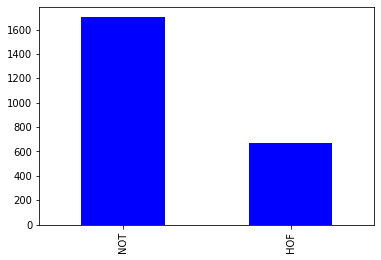

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["HOF","NOT"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[1 1 1 1 0 0 1 1 0 1]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                 Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…
2                                                             @ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen
3      @Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                         RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                       RT @Schrammi44: Er ist einfach der GOAT @Bouncaay ht

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                    Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstuetzung fuer den europaeischen Kl…
2                                                               @ruhrbahn jeden Morgen eine neue „Fahrzeugstoerung“, ihr seid einfach nur zum Kotzen
3        @Junge_Freiheit Die Inkas hatten sich schon daemlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                            RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                   ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                          RT @Schrammi44: Er ist einfach 

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                          deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: die deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen ihrer fehlenden unterstuetzung fuer den europaeischen kl 
2                                                               ruhrbahn jeden morgen eine neue  fahrzeugstoerung , ihr seid einfach nur zum kotzen
3        junge freiheit die inkas hatten sich schon daemlich angestellt, bei den spanischen eindringlingen, aber der deutsche toppt dann doch alles
4                               technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen vater in arsch ficken
5                                                                                         ich habe mir gerade diese dorne aus meinem arsch gezogen 
6                                                                                                    schrammi44:

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                            deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterstuetzung fuer europaeischen kl 
2                                                                        ruhrbahn morgen neue  fahrzeugstoerung , seid einfach kotzen
3                                           junge freiheit inkas schon daemlich angestellt, spanischen eindringlingen, deutsche toppt
4                                            technosteron: leute 'boar' schreiben lassen bestimmt analphabetischen vater arsch ficken
5                                                                                                         gerade dorne arsch gezogen 
6                                                                                                 schrammi44: einfach goat  bouncaay 
7                  kfm deutsche mittelstand ag: deutscher mitt

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                            deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterstuetzung fuer europaeischen kl 
2                                                                        ruhrbahn morgen neue  fahrzeugstoerung , seid einfach kotzen
3                                           junge freiheit inkas schon daemlich angestellt, spanischen eindringlingen, deutsche toppt
4                                            technosteron: leute 'boar' schreiben lassen bestimmt analphabetischen vater arsch ficken
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

8866


In [ ]:


l = tok_all.word_index
print(l)



{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'schon': 5, 'fuer': 6, 'gt': 7, 'mal': 8, 'gruenen': 9, 'scheiss': 10, 'nazis': 11, 'dumm': 12, 'frauen': 13, 'halt': 14, 'ab': 15, 'porno': 16, 'welt': 17, 'linken': 18, 'mehr': 19, 'tagesschau': 20, 'hurensohn': 21, 'ja': 22, 'zurueck': 23, 'echt': 24, 'gibt': 25, 'gratis': 26, 'gruene': 27, 'scheisse': 28, 'islam': 29, 'deutschland': 30, 'immer': 31, 'e': 32, 'frau': 33, 'politiker': 34, 'hoe': 35, 'linke': 36, 'pack': 37, 's': 38, 'warum': 39, 'kopf': 40, 'erst': 41, 'eigentlich': 42, 'leute': 43, 'fresse': 44, 'stimmt': 45, 'ueber': 46, 'idioten': 47, '2': 48, 'dumme': 49, 'n': 50, 'afd': 51, 'zdfheute': 52, 'macht': 53, 'waere': 54, 'en': 55, '1': 56, 'd': 57, 'kinder': 58, 'kotzen': 59, 'europa': 60, 'nazi': 61, 'nicht': 62, 'moechte': 63, 'deutschen': 64, 'deutsch': 65, 'lassen': 66, 'politik': 67, 'pa': 68, 'i': 69, 'wuerde': 70, 'ma': 71, 'raus': 72, 'koennte': 73, 'ist': 74, 'zeit': 75, 'geld': 76, 'schulz': 77, 'merkels

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
[2, 2054, 16, 352, 2, 13, 16, 2, 2055, 88, 16, 65, 2056]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
import csv
data_t = pd.read_csv("/content/germeval2018test.txt",sep='\t', encoding = "UTF-8", quoting=csv.QUOTE_NONE, names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data_t.head(10)

data_t['task1'] = data_t['task1'].str.replace('OTHER', 'NOT')
data_t
data_t['task1'] = data_t['task1'].str.replace('OFFENSE', 'HOF')
data_t


,text,task1,task2
0,"Meine Mutter hat mir erzählt, dass mein Vater einen Wahlkreiskandidaten nicht gewählt hat, weil der gegen die Homo-Ehe ist ☺",NOT,OTHER
1,"@Tom174_ @davidbest95 Meine Reaktion; |LBR| Nicht jeder Moslem ist ein Terrorist. Aber jeder Moslem glaubt an Überlieferungen, die Gewalt und Terr...",NOT,OTHER
2,"#Merkel rollt dem Emir von #Katar, der islamistischen Terror unterstützt, den roten Teppich aus.Wir brauchen einen sofortigen #Waffenstopp!",NOT,OTHER
3,„Merle ist kein junges unschuldiges Mädchen“ Kch....... 😱 #tatort,NOT,OTHER
4,@umweltundaktiv Asylantenflut bringt eben nur negatives für Deutschland. Drum Asylanenstop und Rückführung der Mehrzahl.,HOF,ABUSE
...,...,...,...
3527,"@schlabonski tja, es können einen nicht alle Lieben. Es wird immer auch einen geben der einen nicht mag.",NOT,OTHER
3528,"@RKnillmann @lawyerberlin @AfD Aha, der Islam ist eine Religion 😂😂😂",HOF,ABUSE
3529,"@podilein Mannheim, weltoffen und kunterbunt. Und strunzdumme Multikultiliebhaber. Verblödete halt",HOF,ABUSE
3530,@stephanweil was ist nun mit kostenlosen Kitas in der GROKO ???,NOT,OTHER


In [ ]:
data_t.shape

(3532, 3)

In [ ]:
print(data_t.dtypes)

text     object
task1    object
task2    object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0    NOT
1    NOT
2    NOT
3    NOT
4    HOF
Name: task1, dtype: object

NOT    2330
HOF    1202
Name: task1, dtype: int64


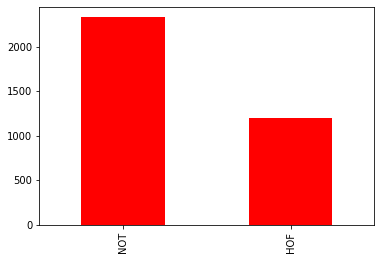

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["HOF","NOT"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[1 1 1 1 0 1 1 1 1 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                             Meine Mutter hat mir erzählt, dass mein Vater einen Wahlkreiskandidaten nicht gewählt hat, weil der gegen die Homo-Ehe ist ☺
1    @Tom174_ @davidbest95 Meine Reaktion; |LBR| Nicht jeder Moslem ist ein Terrorist. Aber jeder Moslem glaubt an Überlieferungen, die Gewalt und Terr...
2              #Merkel rollt dem Emir von #Katar, der islamistischen Terror unterstützt, den roten Teppich aus.Wir brauchen einen sofortigen #Waffenstopp!
3                                                                                        „Merle ist kein junges unschuldiges Mädchen“ Kch....... 😱 #tatort
4                                 @umweltundaktiv Asylantenflut bringt eben nur negatives für Deutschland. Drum Asylanenstop und Rückführung der Mehrzahl.
5                                                                            @_StultaMundi Die Bibel enthält ebenfalls Gesetze des Zivil- und Strafrechts.
6                                       @Thueringen_ @Miquwarchar @Pon

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                           meine mutter hat mir erzaehlt, dass mein vater einen wahlkreiskandidaten nicht gewaehlt hat, weil der gegen die homo-ehe ist  
1     tom174   davidbest95 meine reaktion;  lbr  nicht jeder moslem ist ein terrorist. aber jeder moslem glaubt an ueberlieferungen, die gewalt und ter...
2               merkel rollt dem emir von  katar, der islamistischen terror unterstuetzt, den roten teppich aus.wir brauchen einen sofo igen  waffenstopp!
3                                                                                         merle ist kein junges unschuldiges maedchen  kch.......    tato 
4                               umweltundaktiv asylantenflut bringt eben nur negatives fuer deutschland. drum asylanenstop und rueckfuehrung der mehrzahl.
5                                                                             stultamundi die bibel enthaelt ebenfalls gesetze des zivil- und strafrechts.
6                                       thueringen   miquwarchar  pont

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                             mutter erzaehlt, vater wahlkreiskandidaten gewaehlt hat, homo-ehe  
1                              tom174   davidbest95 reaktion;  lbr  moslem terrorist. moslem glaubt ueberlieferungen, gewalt terror beguenstigen.
2                            merkel rollt emir  katar, islamistischen terror unterstuetzt, roten teppich aus.wir brauchen sofo igen  waffenstopp!
3                                                                                         merle junges unschuldiges maedchen  kch.......    tato 
4                                  umweltundaktiv asylantenflut bringt eben negatives fuer deutschland. drum asylanenstop rueckfuehrung mehrzahl.
5                                                                                stultamundi bibel enthaelt ebenfalls gesetze zivil- strafrechts.
6                                          thueringen   miquwarchar  pontifex de munkelt, franziskus grosser  kiss -  black 

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                             mutter erzaehlt, vater wahlkreiskandidaten gewaehlt hat, homo-ehe  
1                              tom174   davidbest95 reaktion;  lbr  moslem terrorist. moslem glaubt ueberlieferungen, gewalt terror beguenstigen.
2                            merkel rollt emir  katar, islamistischen terror unterstuetzt, roten teppich aus.wir brauchen sofo igen  waffenstopp!
3                                                                                         merle junges unschuldiges maedchen  kch.......    tato 
4                                  umweltundaktiv asylantenflut bringt eben negatives fuer deutschland. drum asylanenstop rueckfuehrung mehrzahl.
5                                                                                stultamundi bibel enthaelt ebenfalls gesetze zivil- strafrechts.
6                                          thueringen   miquwarchar  pontifex de munkelt, franziskus grosser  kiss -  black 

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



11999


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'lbr': 1, 'fuer': 2, 'ja': 3, 'spd': 4, 'thomasmichael71': 5, 'mal': 6, 'miatamuc': 7, 'afd': 8, 'deutschland': 9, 'mehr': 10, 'frauen': 11, 'schon': 12, 'immer': 13, 'ist': 14, 'merkel': 15, 'mountainman1977': 16, 'gibt': 17, 'geht': 18, 'ueber': 19, 'nicht': 20, 'd': 21, 'beck': 22, 'e': 23, 'wer': 24, 'frau': 25, 'ma': 26, 'menschen': 27, 'gruenen': 28, 'werden': 29, 'pa': 30, 'heute': 31, 'rspctfl': 32, 'leben': 33, 'warum': 34, 'gut': 35, 'deutsche': 36, 'en': 37, 'ei': 38, 'houelle': 39, 'recht': 40, 'innenwelttramp': 41, 'waere': 42, 'haben': 43, 'koennen': 44, 'sein': 45, 'muessen': 46, 'cdu': 47, 'eigentlich': 48, 'deutschen': 49, 'ksemann2': 50, 'drkassandrapari': 51, 'wuerde': 52, 'genau': 53, 'f': 54, 'steht': 55, 'macht': 56, 'welt': 57, 've': 58, 'a': 59, 'tom174': 60, 'konseqliberal': 61, 'ergroovt': 62, 'einfach': 63, 'liebe': 64, 'nein': 65, 'besser': 66, 'islam': 67, 'endlich': 68, 'maenner': 69, 'fdp': 70, 'sind': 71, 'darf': 72, 'lassen': 73, 'kommt': 74, 'tun': 75

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



mutter erzaehlt, vater wahlkreiskandidaten gewaehlt hat, homo-ehe  
[154, 2043, 1045, 341, 199, 6627]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

gzip: /content/drive/MyDrive/cc.de.300.vec.gz: No such file or directory


In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          2660100   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_GERMEVAL2018_Task_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
75/75 [==============================] - ETA: 0s - loss: 0.6568 - accuracy: 0.7134

75/75 [==============================] - 13s 7ms/step - loss: 0.6568 - accuracy: 0.7134 - lr: 3.0000e-05
Epoch 2/200
69/75 [==========================>...] - ETA: 0s - loss: 0.6016 - accuracy: 0.7129

75/75 [==============================] - 0s 6ms/step - loss: 0.5979 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 3/200
67/75 [=========================>....] - ETA: 0s - loss: 0.5895 - accuracy: 0.7169

75/75 [==============================] - 0s 6ms/step - loss: 0.5900 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 4/200
71/75 [===========================>..] - ETA: 0s - loss: 0.5882 - accuracy: 0.7139

75/75 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 5/200
68/75 [==========================>...] - ETA: 0s - loss: 0.5777 - accuracy: 0.7165

75/75 [==============================] - 0s 6ms/step - loss: 0.5781 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 6/200
69/75 [==========================>...] - ETA: 0s - loss: 0.5740 - accuracy: 0.7156

75/75 [==============================] - 0s 6ms/step - loss: 0.5728 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 7/200
69/75 [==========================>...] - ETA: 0s - loss: 0.5686 - accuracy: 0.7124

75/75 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 8/200
69/75 [==========================>...] - ETA: 0s - loss: 0.5512 - accuracy: 0.7174

75/75 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7164 - lr: 3.0000e-05
Epoch 9/200
71/75 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7179

75/75 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.7172 - lr: 3.0000e-05
Epoch 10/200
71/75 [===========================>..] - ETA: 0s - loss: 0.5108 - accuracy: 0.7346

75/75 [==============================] - 0s 5ms/step - loss: 0.5135 - accuracy: 0.7316 - lr: 3.0000e-05
Epoch 11/200
67/75 [=========================>....] - ETA: 0s - loss: 0.4898 - accuracy: 0.7495

75/75 [==============================] - 0s 6ms/step - loss: 0.4886 - accuracy: 0.7501 - lr: 3.0000e-05
Epoch 12/200
70/75 [===========================>..] - ETA: 0s - loss: 0.4589 - accuracy: 0.7781

75/75 [==============================] - 0s 5ms/step - loss: 0.4587 - accuracy: 0.7771 - lr: 3.0000e-05
Epoch 13/200
69/75 [==========================>...] - ETA: 0s - loss: 0.4268 - accuracy: 0.8048

75/75 [==============================] - 0s 6ms/step - loss: 0.4245 - accuracy: 0.8074 - lr: 3.0000e-05
Epoch 14/200
70/75 [===========================>..] - ETA: 0s - loss: 0.3919 - accuracy: 0.8335

75/75 [==============================] - 0s 6ms/step - loss: 0.3885 - accuracy: 0.8365 - lr: 3.0000e-05
Epoch 15/200
68/75 [==========================>...] - ETA: 0s - loss: 0.3476 - accuracy: 0.8594

75/75 [==============================] - 0s 6ms/step - loss: 0.3510 - accuracy: 0.8559 - lr: 3.0000e-05
Epoch 16/200
69/75 [==========================>...] - ETA: 0s - loss: 0.3254 - accuracy: 0.8791

75/75 [==============================] - 0s 6ms/step - loss: 0.3232 - accuracy: 0.8803 - lr: 3.0000e-05
Epoch 17/200
71/75 [===========================>..] - ETA: 0s - loss: 0.2936 - accuracy: 0.8886

75/75 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.8879 - lr: 3.0000e-05
Epoch 18/200
69/75 [==========================>...] - ETA: 0s - loss: 0.2666 - accuracy: 0.8999

75/75 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.8989 - lr: 3.0000e-05
Epoch 19/200
68/75 [==========================>...] - ETA: 0s - loss: 0.2409 - accuracy: 0.9127

75/75 [==============================] - 0s 6ms/step - loss: 0.2411 - accuracy: 0.9128 - lr: 3.0000e-05
Epoch 20/200
71/75 [===========================>..] - ETA: 0s - loss: 0.2206 - accuracy: 0.9195

75/75 [==============================] - 0s 6ms/step - loss: 0.2204 - accuracy: 0.9195 - lr: 3.0000e-05
Epoch 21/200
71/75 [===========================>..] - ETA: 0s - loss: 0.2043 - accuracy: 0.9287

75/75 [==============================] - 0s 5ms/step - loss: 0.2054 - accuracy: 0.9279 - lr: 3.0000e-05
Epoch 22/200
70/75 [===========================>..] - ETA: 0s - loss: 0.1829 - accuracy: 0.9393

75/75 [==============================] - 0s 5ms/step - loss: 0.1822 - accuracy: 0.9393 - lr: 3.0000e-05
Epoch 23/200
69/75 [==========================>...] - ETA: 0s - loss: 0.1721 - accuracy: 0.9407

75/75 [==============================] - 0s 6ms/step - loss: 0.1673 - accuracy: 0.9435 - lr: 3.0000e-05
Epoch 24/200
68/75 [==========================>...] - ETA: 0s - loss: 0.1490 - accuracy: 0.9527

75/75 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 0.9524 - lr: 3.0000e-05
Epoch 25/200
69/75 [==========================>...] - ETA: 0s - loss: 0.1333 - accuracy: 0.9588

75/75 [==============================] - 0s 6ms/step - loss: 0.1355 - accuracy: 0.9583 - lr: 3.0000e-05
Epoch 26/200
70/75 [===========================>..] - ETA: 0s - loss: 0.1240 - accuracy: 0.9647

75/75 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9646 - lr: 3.0000e-05
Epoch 27/200
67/75 [=========================>....] - ETA: 0s - loss: 0.1105 - accuracy: 0.9678

75/75 [==============================] - 0s 6ms/step - loss: 0.1102 - accuracy: 0.9676 - lr: 3.0000e-05
Epoch 28/200
68/75 [==========================>...] - ETA: 0s - loss: 0.1026 - accuracy: 0.9729

75/75 [==============================] - 0s 6ms/step - loss: 0.1035 - accuracy: 0.9722 - lr: 3.0000e-05
Epoch 29/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0966 - accuracy: 0.9746

75/75 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.9747 - lr: 3.0000e-05
Epoch 30/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0876 - accuracy: 0.9766

75/75 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 0.9777 - lr: 3.0000e-05
Epoch 31/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0758 - accuracy: 0.9841

75/75 [==============================] - 0s 5ms/step - loss: 0.0764 - accuracy: 0.9836 - lr: 3.0000e-05
Epoch 32/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0712 - accuracy: 0.9835

75/75 [==============================] - 0s 6ms/step - loss: 0.0708 - accuracy: 0.9840 - lr: 3.0000e-05
Epoch 33/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0673 - accuracy: 0.9851

75/75 [==============================] - 0s 5ms/step - loss: 0.0658 - accuracy: 0.9861 - lr: 3.0000e-05
Epoch 34/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0593 - accuracy: 0.9859

75/75 [==============================] - 0s 5ms/step - loss: 0.0592 - accuracy: 0.9861 - lr: 3.0000e-05
Epoch 35/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0559 - accuracy: 0.9869

75/75 [==============================] - 0s 6ms/step - loss: 0.0555 - accuracy: 0.9874 - lr: 3.0000e-05
Epoch 36/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0472 - accuracy: 0.9908

75/75 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9907 - lr: 3.0000e-05
Epoch 37/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0477 - accuracy: 0.9900

75/75 [==============================] - 0s 6ms/step - loss: 0.0481 - accuracy: 0.9886 - lr: 3.0000e-05
Epoch 38/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0427 - accuracy: 0.9913

75/75 [==============================] - 0s 6ms/step - loss: 0.0419 - accuracy: 0.9916 - lr: 3.0000e-05
Epoch 39/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0381 - accuracy: 0.9917

75/75 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9916 - lr: 3.0000e-05
Epoch 40/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0377 - accuracy: 0.9918

75/75 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9924 - lr: 3.0000e-05
Epoch 41/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0344 - accuracy: 0.9923

75/75 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9924 - lr: 3.0000e-05
Epoch 42/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0321 - accuracy: 0.9945

75/75 [==============================] - 0s 6ms/step - loss: 0.0326 - accuracy: 0.9937 - lr: 3.0000e-05
Epoch 43/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0308 - accuracy: 0.9941

75/75 [==============================] - 0s 6ms/step - loss: 0.0307 - accuracy: 0.9937 - lr: 3.0000e-05
Epoch 44/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0285 - accuracy: 0.9959

75/75 [==============================] - 0s 5ms/step - loss: 0.0275 - accuracy: 0.9962 - lr: 3.0000e-05
Epoch 45/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0248 - accuracy: 0.9965

75/75 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.9966 - lr: 3.0000e-05
Epoch 46/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9950

75/75 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 0.9954 - lr: 3.0000e-05
Epoch 47/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9972

75/75 [==============================] - 0s 6ms/step - loss: 0.0214 - accuracy: 0.9966 - lr: 3.0000e-05
Epoch 48/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0195 - accuracy: 0.9977

75/75 [==============================] - 0s 6ms/step - loss: 0.0191 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 49/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0179 - accuracy: 0.9977

75/75 [==============================] - 0s 6ms/step - loss: 0.0182 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 50/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0166 - accuracy: 0.9972

75/75 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 51/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0148 - accuracy: 0.9981

75/75 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.9979 - lr: 3.0000e-05
Epoch 52/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0149 - accuracy: 0.9973

75/75 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 53/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0125 - accuracy: 0.9987

75/75 [==============================] - 0s 5ms/step - loss: 0.0125 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 54/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0142 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 55/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0120 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0121 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 56/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0090 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 57/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0109 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0106 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 58/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0102 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 59/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0092 - accuracy: 0.9982

75/75 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 60/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9982

75/75 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 61/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0090 - accuracy: 0.9976

75/75 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9975 - lr: 3.0000e-05
Epoch 62/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0087 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0087 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 63/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0079 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 64/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0076 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0078 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 65/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0070 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 66/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0068 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 67/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9982

75/75 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 68/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0064 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 69/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0063 - accuracy: 0.9986

75/75 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 70/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0062 - accuracy: 0.9981

75/75 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 0.9983 - lr: 3.0000e-05
Epoch 71/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0051 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 72/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0054 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 73/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0050 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 74/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0052 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 75/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0044 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 76/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0045 - accuracy: 0.9991

75/75 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 77/200
75/75 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 78/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0046 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0044 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 79/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0042 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0039 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 80/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0039 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 81/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0035 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 82/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0036 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 83/200
74/75 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 84/200
74/75 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 85/200
75/75 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 86/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0028 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 87/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0035 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 88/200
75/75 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 89/200
74/75 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 90/200
74/75 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 91/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0030 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 92/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 93/200
74/75 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 94/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0023 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 95/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 96/200
74/75 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 97/200
73/75 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 98/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 99/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 100/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 101/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0026 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 102/200
74/75 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 103/200
74/75 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 104/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0037 - accuracy: 0.9991

75/75 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 105/200
71/75 [===========================>..] - ETA: 0s - loss: 0.0029 - accuracy: 0.9987

75/75 [==============================] - 1s 8ms/step - loss: 0.0029 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 106/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995

75/75 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 107/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0027 - accuracy: 0.9991

75/75 [==============================] - 1s 7ms/step - loss: 0.0026 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 108/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0019 - accuracy: 0.9991

75/75 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 109/200
73/75 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

75/75 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 110/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

75/75 [==============================] - 1s 8ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 111/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 112/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0018 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 113/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0022 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 114/200
75/75 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 115/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0022 - accuracy: 0.9986

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 116/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 117/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 118/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 119/200
74/75 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 120/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 121/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 122/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 123/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0022 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 124/200
75/75 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 125/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 126/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0019 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 127/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 128/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 129/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 130/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9991

75/75 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 131/200
74/75 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 132/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0023 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 133/200
75/75 [==============================] - ETA: 0s - loss: 9.9036e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 9.9036e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 134/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 135/200
75/75 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 136/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995    

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 137/200
67/75 [=========================>....] - ETA: 0s - loss: 6.6767e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 138/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 139/200
70/75 [===========================>..] - ETA: 0s - loss: 8.4597e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 8.0670e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 140/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 141/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 142/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 143/200
75/75 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 144/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000    

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 145/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 146/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 147/200
74/75 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 148/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996

75/75 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 149/200
66/75 [=========================>....] - ETA: 0s - loss: 8.8946e-04 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 8.2573e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 150/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0020 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 151/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 152/200
75/75 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 153/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 154/200
75/75 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996    

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 155/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 156/200
74/75 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 157/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 158/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 159/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 160/200
73/75 [============================>.] - ETA: 0s - loss: 9.6833e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 9.5462e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 161/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995    

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 162/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 163/200
71/75 [===========================>..] - ETA: 0s - loss: 6.4825e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 6.4142e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 164/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995    

75/75 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 165/200
69/75 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9991

75/75 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 166/200
68/75 [==========================>...] - ETA: 0s - loss: 8.4891e-04 - accuracy: 0.9995

75/75 [==============================] - 1s 7ms/step - loss: 7.8696e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 167/200
71/75 [===========================>..] - ETA: 0s - loss: 9.2552e-04 - accuracy: 0.9996

75/75 [==============================] - 1s 8ms/step - loss: 8.9632e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 168/200
70/75 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996

75/75 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 169/200
75/75 [==============================] - ETA: 0s - loss: 6.9610e-04 - accuracy: 1.0000

75/75 [==============================] - 1s 7ms/step - loss: 6.9610e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 170/200
71/75 [===========================>..] - ETA: 0s - loss: 5.8968e-04 - accuracy: 0.9996

75/75 [==============================] - 1s 8ms/step - loss: 5.6907e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 171/200
75/75 [==============================] - ETA: 0s - loss: 7.9621e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 7.9621e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 172/200
73/75 [============================>.] - ETA: 0s - loss: 9.7317e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 173/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9991    

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 174/200
75/75 [==============================] - ETA: 0s - loss: 8.0944e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 8.0944e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 175/200
73/75 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 176/200
68/75 [==========================>...] - ETA: 0s - loss: 5.8181e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 5.4756e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 177/200
74/75 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 178/200
75/75 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 179/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0020 - accuracy: 0.9991    

75/75 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 180/200
75/75 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 181/200
67/75 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 182/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9991    

75/75 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 183/200
67/75 [=========================>....] - ETA: 0s - loss: 8.1410e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 184/200
67/75 [=========================>....] - ETA: 0s - loss: 9.3854e-04 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 8.6048e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 185/200
75/75 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9992    

75/75 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 186/200
75/75 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9987

75/75 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 0.9987 - lr: 3.0000e-05
Epoch 187/200
74/75 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 188/200
72/75 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9991    

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 189/200
75/75 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 190/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 191/200
68/75 [==========================>...] - ETA: 0s - loss: 0.0023 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 192/200
66/75 [=========================>....] - ETA: 0s - loss: 0.0020 - accuracy: 0.9991

75/75 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 193/200
74/75 [============================>.] - ETA: 0s - loss: 4.7762e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 4.7662e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 194/200
67/75 [=========================>....] - ETA: 0s - loss: 7.3865e-04 - accuracy: 0.9995

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 195/200
75/75 [==============================] - ETA: 0s - loss: 7.7594e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 7.7594e-04 - accuracy: 1.0000 - lr: 3.0000e-05
Epoch 196/200
74/75 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992

75/75 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.9992 - lr: 3.0000e-05
Epoch 197/200
73/75 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996    

75/75 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 198/200
72/75 [===========================>..] - ETA: 0s - loss: 8.6930e-04 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 8.6223e-04 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 199/200
74/75 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996

75/75 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 3.0000e-05
Epoch 200/200
72/75 [===========================>..] - ETA: 0s - loss: 4.7170e-04 - accuracy: 1.0000

75/75 [==============================] - 0s 6ms/step - loss: 4.6470e-04 - accuracy: 1.0000 - lr: 3.0000e-05


# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

2.5124110467129195

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([0, 1, 1, ..., 1, 1, 1])

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



      task1
0         0
1         1
2         1
3         1
4         1
...     ...
3527      1
3528      1
3529      1
3530      1
3531      1

[3532 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_Train_HASOC2020_Test_GermEval2018_Task_A_submission_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.49      0.20      0.29      1202
           1       0.68      0.89      0.77      2330

   micro avg       0.66      0.66      0.66      3532
   macro avg       0.59      0.55      0.53      3532
weighted avg       0.62      0.66      0.61      3532
 samples avg       0.66      0.66      0.66      3532



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

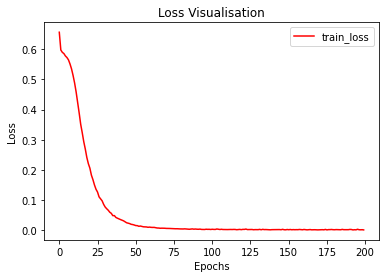

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_Train_HASOC2020_Test_GermEval2018_Task_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_Train_HASOC2020_Test_GermEval2018_Task_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

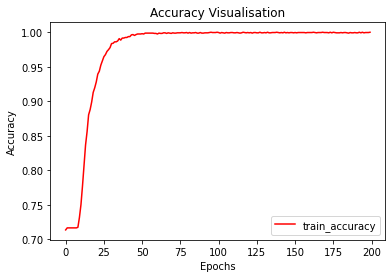

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_Train_HASOC2020_Test_GermEval2018_Task_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_Train_HASOC2020_Test_GermEval2018_Task_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_Train_HASOC2020_Test_GermEval2018_Task_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_Train_HASOC2020_Test_GermEval2018_Task_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

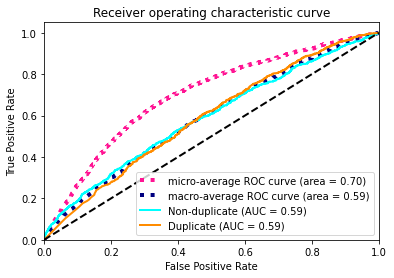

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)